# ABOUT
- this notebook performs **hypothesis testing for effect of neg_seq_len**
- Background:
    - neg_seq_len controls the number of negative items to use in the CCL loss
    - hypothesis testing could be utilized to invstigate if there is any significant positive effect
- Approach:
    - we conduct a Paired/dependent T-test
        - randomly sample 20 hyperparameter sets
        - each set consists of 6 hyperparameters: 'embedding_size', 'margin', 'negative_weight', 'neg_seq_len', 'gamma', 'history_len'
        - each paired sample consists of neg_seq_len>1 (a) and neg_seq_len==1 (b)
        - because negative weight has a strong effect on neg_seq_len, i set neg_seq_len==negative_weight
        - evaluate all sets using SimpleX on ml-100k dataset
        - use a paired t-test at 5% significance
        - let d=a-b
        - https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/
- finding:
    - for the hypothesis, H0: d <= 0, H1: d > 0, the p value is 4.736857304744508e-06 < 0.05, thus we reject H0
    - neg_seq_len has a significant positive effect on performance

## Hypothesis test 1
- 20 samples taken are best valid score

In [1]:
import pandas as pd
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies\neg_seq_len_ablation_study.csv"
results = pd.read_csv(path)
results

,Name,external_config_dict.neg_seq_len,valid/ndcg@10,valid/ndcg@20,valid/recall@10,valid/recall@20
0,SimpleX-37-0.3-0.0-1-1-52-0.001,1,0.1444,0.1593,0.0798,0.1456
1,SimpleX-37-0.3-0.0-71-71-52-0.001,71,0.1582,0.1726,0.1093,0.1701
2,SimpleX-59-0.2-0.5-1-1-51-0.001,1,0.1515,0.1744,0.0945,0.1738
3,SimpleX-59-0.2-0.5-100-100-51-0.001,100,0.1441,0.1619,0.0947,0.1621
4,SimpleX-39-0.4-1.0-1-1-32-0.001,1,0.1585,0.1771,0.0883,0.1645
5,SimpleX-39-0.4-1.0-86-86-32-0.001,86,0.1560,0.1757,0.1037,0.1745
6,SimpleX-19-0.9-0.1-1-1-44-0.001,1,0.1016,0.1224,0.0632,0.1273
7,SimpleX-19-0.9-0.1-24-24-44-0.001,24,0.2406,0.2569,0.1501,0.2467
8,SimpleX-37-0.6-1.0-1-1-45-0.001,1,0.1545,0.1769,0.0897,0.1700
9,SimpleX-37-0.6-1.0-33-33-45-0.001,33,0.2226,0.2406,0.1460,0.2314


In [2]:
from numpy import array,mean,sqrt
from statistics import stdev

def get_dependent_samples(df, dependent_variable, independent_variable):
    a = results.loc[results[dependent_variable]>1, independent_variable].tolist()
    b = results.loc[results[dependent_variable]==1, independent_variable].tolist()
    return a, b

def dependent_t_test(a, b):
    a,b = array(a),array(b)
    d = a-b
    t = mean(d)/(stdev(d)/sqrt(len(d)))
    return t

In [3]:
a,b = get_dependent_samples(results, "external_config_dict.neg_seq_len","valid/ndcg@20")

In [4]:
dependent_t_test(a, b)

5.974765484498268

In [5]:
import scipy.stats as stats
stats.ttest_rel(a,b, alternative = "greater")

Ttest_relResult(statistic=5.974765484498268, pvalue=4.736857304744508e-06)

### plot generation

In [6]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies\neg_seq_len_ablation_study_plots.csv"
results0 = pd.read_csv(path)
results0 = results0[[col for col in results0.columns if "MAX" in col or col=="Step"]]
results0 = results0.ffill()
results0

,Step,SimpleX-37-0.3-0.0-1-1-52-0.001 - valid/recall@10__MAX,SimpleX-37-0.3-0.0-71-71-52-0.001 - valid/recall@10__MAX,SimpleX-59-0.2-0.5-1-1-51-0.001 - valid/recall@10__MAX,SimpleX-59-0.2-0.5-100-100-51-0.001 - valid/recall@10__MAX,SimpleX-39-0.4-1.0-1-1-32-0.001 - valid/recall@10__MAX,SimpleX-39-0.4-1.0-86-86-32-0.001 - valid/recall@10__MAX,SimpleX-19-0.9-0.1-1-1-44-0.001 - valid/recall@10__MAX,SimpleX-19-0.9-0.1-24-24-44-0.001 - valid/recall@10__MAX,SimpleX-37-0.6-1.0-1-1-45-0.001 - valid/recall@10__MAX,...,SimpleX-32-0.6-1.0-1-1-43-0.001 - valid/recall@10__MAX,SimpleX-32-0.6-1.0-38-38-43-0.001 - valid/recall@10__MAX,SimpleX-57-0.5-0.2-1-1-87-0.001 - valid/recall@10__MAX,SimpleX-57-0.5-0.2-55-55-87-0.001 - valid/recall@10__MAX,SimpleX-12-0.8-0.1-1-1-41-0.001 - valid/recall@10__MAX,SimpleX-12-0.8-0.1-43-43-41-0.001 - valid/recall@10__MAX,SimpleX-23-0.7-1.0-1-1-30-0.001 - valid/recall@10__MAX,SimpleX-23-0.7-1.0-37-37-30-0.001 - valid/recall@10__MAX,SimpleX-46-0.0-0.9-1-1-11-0.001 - valid/recall@10__MAX,SimpleX-46-0.0-0.9-63-63-11-0.001 - valid/recall@10__MAX
0,1,0.0456,0.0868,0.0091,0.0741,0.0071,0.0661,0.0353,0.1195,0.0073,...,0.0076,0.0646,0.0481,0.0998,0.0214,0.0663,0.0074,0.0500,0.0068,0.0401
1,3,0.0463,0.0758,0.0643,0.0562,0.0085,0.0826,0.0418,0.1303,0.0077,...,0.0084,0.0989,0.0627,0.1102,0.0335,0.0842,0.0088,0.0893,0.0072,0.0812
2,5,0.0485,0.0898,0.0829,0.0897,0.0176,0.0943,0.0524,0.1293,0.0136,...,0.0140,0.1165,0.0705,0.1186,0.0368,0.1042,0.0110,0.1142,0.0174,0.0955
3,7,0.0671,0.0801,0.0864,0.0981,0.0391,0.0997,0.0593,0.1302,0.0274,...,0.0276,0.1248,0.0689,0.1307,0.0365,0.1038,0.0189,0.1273,0.0454,0.0974
4,9,0.1036,0.1004,0.0922,0.0929,0.0648,0.1096,0.0582,0.1398,0.0424,...,0.0425,0.1303,0.0899,0.1288,0.0424,0.0891,0.0315,0.1287,0.0788,0.1039
5,11,0.1055,0.0994,0.0976,0.0956,0.0786,0.1083,0.0607,0.1469,0.0599,...,0.0615,0.1354,0.0980,0.1242,0.0480,0.0944,0.0469,0.1383,0.0933,0.1129
6,13,0.0988,0.1041,0.0952,0.0982,0.0811,0.1082,0.0629,0.1503,0.0751,...,0.0743,0.1386,0.0999,0.1307,0.0494,0.0809,0.0592,0.1400,0.1005,0.1197
7,15,0.0936,0.1008,0.0894,0.0899,0.0869,0.1042,0.0608,0.1477,0.0854,...,0.0816,0.1387,0.0976,0.1275,0.0574,0.1020,0.0719,0.1376,0.1026,0.1185
8,17,0.0858,0.1141,0.0948,0.1034,0.0871,0.1037,0.0621,0.1520,0.0870,...,0.0892,0.1426,0.0989,0.1333,0.0586,0.1020,0.0810,0.1448,0.0992,0.1239
9,19,0.0798,0.1093,0.0945,0.0947,0.0883,0.1037,0.0632,0.1501,0.0897,...,0.0868,0.1430,0.0915,0.1252,0.0572,0.1020,0.0808,0.1484,0.0974,0.1214


In [7]:
def is_neg_seq_len_one(colname = 'SimpleX-30-0.0-0.7-43-20-61-0.001 - valid/recall@10__MAX'):
    return colname.split("-")[4]=="1"
a_columns = [col for col in results0.columns if col!="Step" and not is_neg_seq_len_one(col)]
b_columns = [col for col in results0.columns if col!="Step" and is_neg_seq_len_one(col)]

In [41]:
from seaborn import lineplot
import matplotlib.pyplot as plt

In [30]:
temp = {
    "neg_seq_len>1":results0[a_columns].mean(axis=1),
    "neg_seq_len==1":results0[b_columns].mean(axis=1),
    "epochs":list(range(1,11))
}
temp = pd.melt(pd.DataFrame(temp), value_vars = ["neg_seq_len>1","neg_seq_len==1"],id_vars = "epochs")

# Plot

[Text(0.5, 1.0, 'Effect of having multiple negative samples'),
 Text(0.5, 0, 'epochs'),
 Text(0, 0.5, 'Recall@10')]

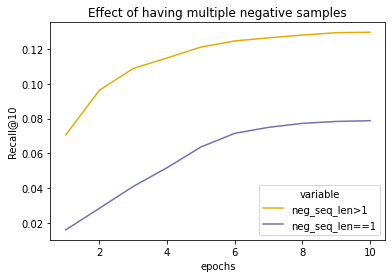

In [47]:
p = lineplot(temp, x = "epochs", y = "value", hue = "variable", palette = "Dark2_r")
p.set(title="Effect of having multiple negative samples", xlabel = "epochs",ylabel = "Recall@10")

## Hypothesis testing 2
- 200 samples taken over all epochs

In [13]:
def get_dependent_samples_at_all_epochs(df):
    a = []
    b = []
    for i in range(0,len(df.columns),2):
        col_a = df.columns[i+1]
        col_b = df.columns[i]
        a.extend(df[col_a].tolist())
        b.extend(df[col_b].tolist())
    return a,b

In [14]:
a,b = get_dependent_samples_at_all_epochs(results0.iloc[:,1:])

In [15]:
stats.ttest_rel(a,b, alternative = "greater")

Ttest_relResult(statistic=27.268604565995034, pvalue=1.9643647300924777e-69)